<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install pyupbit

In [75]:
import pyupbit

In [76]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-etc", interval="minute60")
df

,open,high,low,close,volume,value
2021-11-02 11:00:00,63780.0,64000.0,63400.0,63500.0,99520.938996,6.325992e+09
2021-11-02 12:00:00,63500.0,63880.0,63410.0,63810.0,54608.387237,3.473209e+09
2021-11-02 13:00:00,63810.0,64000.0,63620.0,63960.0,59994.978187,3.824104e+09
2021-11-02 14:00:00,63960.0,63990.0,63610.0,63860.0,56231.089602,3.585933e+09
2021-11-02 15:00:00,63860.0,63970.0,63670.0,63960.0,49633.387787,3.167778e+09
...,...,...,...,...,...,...
2021-11-10 14:00:00,73600.0,73800.0,72720.0,73180.0,232136.566070,1.702611e+10
2021-11-10 15:00:00,73200.0,74450.0,73000.0,74420.0,210442.249971,1.548427e+10
2021-11-10 16:00:00,74430.0,75050.0,73820.0,73830.0,213830.603484,1.590614e+10
2021-11-10 17:00:00,73840.0,74250.0,73550.0,73930.0,97644.654489,7.215781e+09


In [77]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-11-02 11:00:00,63500.0
1,2021-11-02 12:00:00,63810.0
2,2021-11-02 13:00:00,63960.0
3,2021-11-02 14:00:00,63860.0
4,2021-11-02 15:00:00,63960.0
...,...,...
195,2021-11-10 14:00:00,73180.0
196,2021-11-10 15:00:00,74420.0
197,2021-11-10 16:00:00,73830.0
198,2021-11-10 17:00:00,73930.0


In [78]:
#prophet 불러옴
from fbprophet import Prophet

In [79]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [80]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

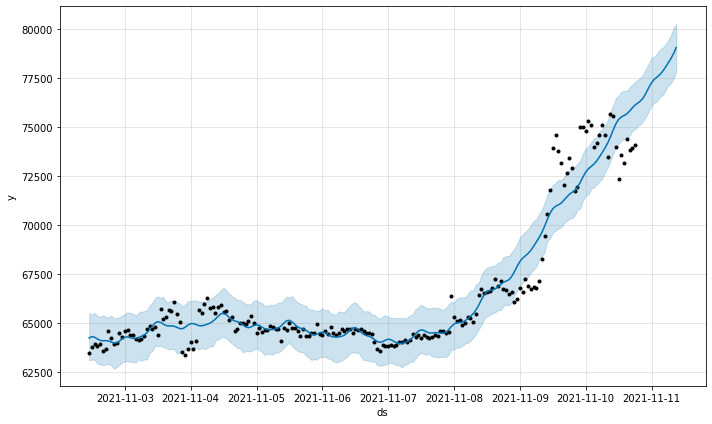

In [81]:
#그래프1
fig1 = model.plot(forecast)

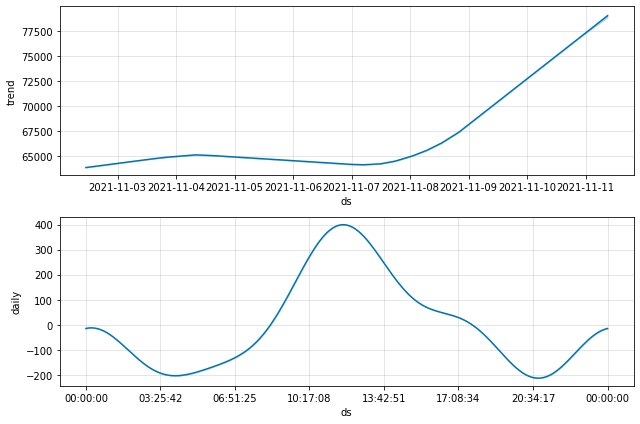

In [82]:
#그래프2
fig2 = model.plot_components(forecast)